In [3]:
import random
# generate dice
def get_dice():
    x = random.randint(1, 6)
    y = random.randint(1, 6)
    z = random.randint(1, 6)
    return [x, y, z]

In [4]:
# strategy B
def strategy_3(bound):
    score = 0
    for i in range(10):
        dice = get_dice()
        curr_roll = 0
        for idx in range(3):
            curr_roll += dice[idx]
        if score > bound:
            temp1 = score + curr_roll
            temp2 = score - 10
            if abs(temp1 - 50) >= abs(temp2 - 50):
                continue
        score += curr_roll
    return abs(score-50)

In [22]:
print(strategy_3(50))

54


In [12]:
def play_game3(para_A, para_B, n):
    win_A = 0
    win_B = 0
    for i in range(n):
        player_A = strategy_3(para_A)
        player_B = strategy_3(para_B)
        if (player_A < player_B):
            win_A+=1
        elif (player_A > player_B):
            win_B+=1
        else:
            win_A += 1
            win_B += 1
    return win_A /n


In [7]:
# experiment for strategy B with different parameters
para_3 = [35, 40, 45, 50, 55, 60, 65]
result = [[0, 0, 0, 0, 0, 0, 0] for i in range(7)]
for i in range(7):
    for j in range(7):
        record_run = [0]*10
        for runs in range(10):
            record_run[runs] = play_game3(para_3[i], para_3[j], 1000)
        high = max(record_run)
        low = min(record_run)
        result[i][j] = (low, high)
            

In [8]:
for i in range(7):
    print(result[i])

[(0.517, 0.556), (0.508, 0.564), (0.531, 0.562), (0.573, 0.609), (0.876, 0.913), (0.996, 1.0), (1.0, 1.0)]
[(0.526, 0.568), (0.531, 0.572), (0.495, 0.576), (0.55, 0.621), (0.884, 0.916), (0.997, 1.0), (1.0, 1.0)]
[(0.511, 0.563), (0.531, 0.568), (0.528, 0.578), (0.562, 0.597), (0.883, 0.901), (0.995, 1.0), (1.0, 1.0)]
[(0.49, 0.511), (0.479, 0.533), (0.488, 0.525), (0.537, 0.566), (0.827, 0.85), (0.977, 0.99), (0.999, 1.0)]
[(0.151, 0.171), (0.152, 0.171), (0.155, 0.175), (0.196, 0.227), (0.52, 0.573), (0.841, 0.87), (0.972, 0.987)]
[(0.002, 0.008), (0.001, 0.007), (0.001, 0.009), (0.022, 0.045), (0.174, 0.225), (0.511, 0.568), (0.836, 0.859)]
[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.002), (0.026, 0.04), (0.169, 0.222), (0.508, 0.561)]


In [28]:
import matplotlib.pyplot as plt

# for convergence plot
data = [[0]*50 for i in range(10)]
game_n = [0]*50
for run in range(10):
    i = 0
    for n in range(100, 5100, 100):
        data[run][i] = play_game3(40, 50, n)
        game_n[i] = n
        i+=1
 

    

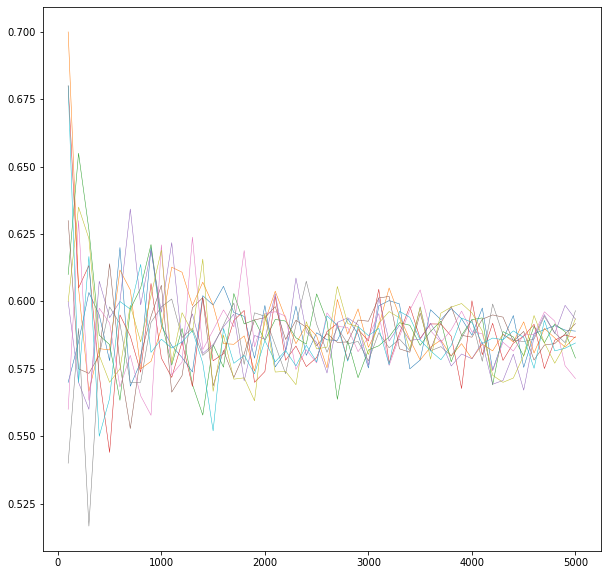

In [29]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.plot(game_n, data[i], linewidth = '0.5')

In [40]:
# for histogram plot
runs = [0] * 5000
for i in range (5000):
    runs[i] = play_game3(40, 50, 5000)

(array([  4.,   3.,  12.,  32.,  62., 103., 187., 259., 376., 455., 499.,
        545., 596., 500., 434., 364., 248., 130.,  87.,  48.,  37.,  11.,
          4.,   1.,   3.]),
 array([0.563   , 0.565016, 0.567032, 0.569048, 0.571064, 0.57308 ,
        0.575096, 0.577112, 0.579128, 0.581144, 0.58316 , 0.585176,
        0.587192, 0.589208, 0.591224, 0.59324 , 0.595256, 0.597272,
        0.599288, 0.601304, 0.60332 , 0.605336, 0.607352, 0.609368,
        0.611384, 0.6134  ]),
 <BarContainer object of 25 artists>)

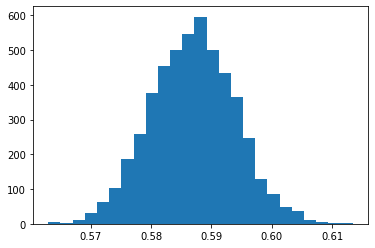

In [49]:
plt.hist(runs, bins=25)